# Introduction to PyTesting

When writing machine learning code in Python, there are several testing frameworks available that can be used to ensure the quality, behaviour and correctness of your code. Using a testing framework for your ML code promotes code quality, reliability, and maintainability. It allows you to catch bugs early, reduce errors, and have confidence in the performance of your machine learning models.

## Benefits of testing code

Validation: Testing frameworks enable you to validate the correctness of your machine learning models and algorithms. By writing tests, you can verify that your code behaves as expected and produces the desired results.

Regression Testing: Machine learning code often evolves over time, and changes made to the codebase can introduce new bugs or break existing functionality. Testing frameworks help in implementing regression testing, allowing you to detect and fix issues when modifying your ML code.

Documentation: Writing tests alongside your code provides executable documentation that demonstrates how your code should be used and the expected outputs. This helps other developers understand and utilize your ML code more effectively.

Continuous Integration: Testing frameworks are commonly used in continuous integration (CI) pipelines to automatically run tests on code changes. CI ensures that your ML code remains functional and reliable as you develop new features or make modifications.

Code Maintainability: Tests act as a safety net, making it easier to refactor or modify your code with confidence. They ensure that the changes you make do not introduce unexpected errors or regressions.

Collaboration: Testing frameworks make it easier for multiple developers to collaborate on ML projects. By running tests, everyone can quickly verify that their changes have not broken existing functionality.





## Popular frameworks available for Python

Some popular testing frameworks in Python include:

__unittest:__ This is a built-in testing framework in Python's standard library. It provides a set of tools for constructing and running tests. unittest is widely used and offers a comprehensive testing solution.

__pytest:__ It is a third-party testing framework that provides a more concise and flexible approach to writing tests compared to unittest. pytest supports advanced features such as fixtures, parameterized testing, and test discovery, making it popular among developers.

__doctest:__ This framework allows you to write tests within the documentation strings (docstrings) of your functions, making it easier to keep tests and code documentation in sync. doctest is lightweight and useful for simple test cases.

__nose:__ It is a test discovery and execution framework that extends unittest. nose automatically discovers test cases and provides additional plugins and features for testing Python code.

In this session we will be using __PyTest__ to write and run our tests.

## Testing Drawbacks

**Sometimes we don't know the answer...**

Unsupervised methods can give us unexpected results, the same input may produce
different results after every run.

**Sometimes the outcomes aren't equal**

np.nan does not equal np.nan, as np.nan is a special floating point number which cannot be equal to any other variable.

**How many tests should you write?**

It can be time consuming to produce tests, but what is the cost of your code being wrong?

You might think you'll only need to test something once, but you'll be thanking your past self when you do a bug fix and realise that it had a knock on effect on your previously working pipeline.



## Types of tests

Test | Description
-|-
Unit Testing | Tests parts of the code in chunks.
Regression Testing | Looks for a specific output given a certain input. Used after changing code e.g. adding a new feature.
Functional Testing | Tests for a specific behaviour.
Fuzzing Testing | Testing random data.
Stress Testing | Attempting to overwhelm/flood the system to check for stability.


# Let's begin!

As we are using Google Collab we will be using ```!```
at the start of our statements to run commands similarly to how you would in a terminal.

We can execute our tests using: ```!python -m pytest python_file_name.py```

PyTest runs on any files that start with 'test' and end with '.py'.



In [1]:
# Import and install the necessary packages
!pip install hypothesis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. Let's mount our google drive to this notebook to access the accompanying Python files.

*Make sure this notebook is contained within 'MyDrive/Pytesting' before running the code below.*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Switch to the google drive folder
%cd drive/MyDrive/Pytesting

/content/drive/MyDrive/Pytesting


In [4]:
# Check what other files are available in this folder
!ls

'2 epoch trained classifier net.pt'
 activations.py
 basic_linear_net.py
 calc_accuracy_mnist.py
 calc_mean.py
 CNNClassifier.py
 compartmentalised_linear_res_net.py
 docs
 MNIST
 __pycache__
 pytorch_tests
 stroke_data.csv
 stroke_model.py
 stroke_model_pytorch.py
 test_accuracy_score_parameterised_example.py
 test_activations_hypothesis_1.py
 test_activations_hypothesis_2.py
 test_activations_hypothesis.py
 test_basic_linear_net.py
 test_calc_mean_1.py
 test_calc_mean.py
 test_CNNClassifier.py
 test_model.py
 test_pytorch_example_1.py


2. We've written a function inside of 'calc_mean.py' to calculate the mean of a list of numbers:

In [5]:
# If we want to display the contents of a Python file we can run
!cat calc_mean.py

def calculate_mean(numbers):
    if len(numbers) == 0:
        return None
    else:
        return sum(numbers) / len(numbers)

3. We want to check it works properly so we've created some simple tests using the Pytest package and the `assert` statement.

The `assert` statement is used to check whether a given expression or condition evaluates to `True` or `False`. If the condition is False, the assert statement raises an AssertionError exception, indicating that the test has failed. Below we use `assert` with the answer calculated by the function and then compare it to our hand calculated answer to check the results match.

In [6]:
# If we want to display the contents of a Python file we can run
!cat test_calc_mean.py


import pytest
import numpy as np
from calc_mean import calculate_mean

def test_calculate_mean():
    numbers = [1, 2, 3, 4, 5]
    assert calculate_mean(numbers) == 3.0

def test_calculate_mean_empty_list():
    numbers = []
    assert calculate_mean(numbers) == None

def test_calculate_mean_single_number():
    numbers = [10]
    assert calculate_mean(numbers) == 10.0

def test_calculate_mean_negative_numbers():
    numbers = [-1, -2, -3, -4, -5]
    # you can also use np.allclose() to assert whether the answers are close
    assert np.allclose(calculate_mean(numbers), -3.0)


In [7]:
# To run the test
# The -v flag shows the tests as they are being processed
!python -m pytest -v test_calc_mean.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/content/drive/MyDrive/Pytesting/.hypothesis/examples')
rootdir: /content/drive/MyDrive/Pytesting
plugins: hypothesis-6.79.3, anyio-3.7.0
collected 4 items                                                              

test_calc_mean.py::test_calculate_mean PASSED                            [ 25%]
test_calc_mean.py::test_calculate_mean_empty_list PASSED                 [ 50%]
test_calc_mean.py::test_calculate_mean_single_number PASSED              [ 75%]
test_calc_mean.py::test_calculate_mean_negative_numbers PASSED           [100%]

============================== 4 passed in 0.48s ===============================


**BRILLIANT!** All the tests were passed! Our code must be functioning correctly... Right?

Yes, the code passes these tests but what if the person executing the code inputs the wrong datatype. For example, say they provide a set instead of a list, what happens?

# Exercise 1: Add a test to check the argument type

Uncomment the first line of the code below when your testing function is ready, to write a new pytesting file. And add a function to check the argument type.

In [8]:
# %%writefile test_calc_mean_1.py

import pytest
from calc_mean import calculate_mean

def test_calculate_mean():
    numbers = [1, 2, 3, 4, 5]
    assert calculate_mean(numbers) == 3.0

def test_calculate_mean_empty_list():
    numbers = []
    assert calculate_mean(numbers) == None

def test_calculate_mean_single_number():
    numbers = [10]
    assert calculate_mean(numbers) == 10.0

def test_calculate_mean_negative_numbers():
    numbers = [-1, -2, -3, -4, -5]
    assert calculate_mean(numbers) == -3.0

def test_calculate_list_of_numbers():
    numbers = {1, 2, 3, 4, 5}
    assert calculate_mean(numbers) == 3.0

Run the cell below to execute your new test!

In [9]:
!python -m pytest test_calc_mean_1.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0
rootdir: /content/drive/MyDrive/Pytesting
plugins: hypothesis-6.79.3, anyio-3.7.0
collected 5 items                                                              

test_calc_mean_1.py .....                                                [100%]

============================== 5 passed in 0.02s ===============================


Your code should still pass, as the function can handle the set.

🌷 Tip: When writing functions such as the ```calculate_mean()``` function it's vital that you write a docstring within the function telling the users what data types they can use and the required structure. To look something like this:



In [10]:
def calculate_mean(numbers):
    """
    Calculate the mean of a list of numbers.

    Args:
        numbers (list): A list of numbers.

    Returns:
        float or None: The mean of the numbers in the list.
                       Returns None if the list is empty.

    Example:
        >>> numbers = [1, 2, 3, 4, 5]
        >>> calculate_mean(numbers)
        3.0
    """
    if len(numbers) == 0:
        return None
    else:
        return sum(numbers) / len(numbers)

Additionally 'error handling' is a good way to manage and respond to errors or exceptions that occur during program execution. It is useful for preventing crashes, improving user experience, and enabling effective debugging and troubleshooting.

There are many different types of exceptions that can occur when using Python, these are built into Python and catch some common errors. Normally these are a blessing and prevent hours of bug searches 🐛 but sometimes these exceptions can throw us off even more.

We can implement our own Try-Except blocks to catch and handle human error for us.

Say for example we try to input a dictionary as an argument in our function, we could implement the Try-Except block as below:

In [11]:
nums = {'a':0, 'b':1, 'c':2}

try:
    assert type(nums) == list
    print("Assertions complete, nums is a list.")
except AssertionError:
    print("Error: data type is incorrect, nums should be a list.")

Error: data type is incorrect, nums should be a list.


## Exercise 2

You don't know what you don't know...

It's hard to come up with tests for every scenario. But we can use the [Hypothesis Package](https://hypothesis.readthedocs.io/en/latest/) to help us come up with edge cases.

Say we have a sigmoid activation function in the activation.py file as shown below:

In [12]:
!cat activations.py

import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))


We can create a test using Hypothesis.
importing `floats` will generate random floats and test for us.

We can also choose to display an AssertionError if the assert is returned as False e.g. below we use "Value not between 0 & 1" if 0 <= result <= 1 is not True.

In [13]:
%%writefile test_activations_hypothesis.py
import activations
from hypothesis import given
from hypothesis.strategies import floats


@given(floats())
def test_sigmoid(x):
    result = activations.sigmoid(x)
    assert 0 <= result <= 1, "Value not between 0 & 1"

Overwriting test_activations_hypothesis.py


In [14]:
!cat test_activations_hypothesis.py

import activations
from hypothesis import given
from hypothesis.strategies import floats


@given(floats())
def test_sigmoid(x):
    result = activations.sigmoid(x)
    assert 0 <= result <= 1, "Value not between 0 & 1"


In [15]:
!python -m pytest -v test_activations_hypothesis.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/content/drive/MyDrive/Pytesting/.hypothesis/examples')
rootdir: /content/drive/MyDrive/Pytesting
plugins: hypothesis-6.79.3, anyio-3.7.0
collected 1 item                                                               

test_activations_hypothesis.py::test_sigmoid FAILED                      [100%]

=================================== FAILURES ===================================
_________________________________ test_sigmoid _________________________________

    @given(floats())
>   def test_sigmoid(x):

test_activations_hypothesis.py:7: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

x = nan

    @given(floats())
    def test_sigmoid(x):
        result = activations.sigmoid(x)
>       assert 0 <= 

The test failed as NaN is not between 0 and 1. Perhaps we didn't think about the implications of NaN and so Hypothesis has kindly pointed this out. We can change our test so that we only test if the input is not NaN:

In [16]:
%%writefile test_activations_hypothesis_1.py
import activations
import numpy as np
from hypothesis import given
from hypothesis.strategies import floats


@given(floats())
def test_sigmoid(x):
    result = activations.sigmoid(x)
    if not np.isnan(x):
      assert 0 <= result <= 1, "Value not between 0 & 1"

Overwriting test_activations_hypothesis_1.py


In [17]:
!python -m pytest -v test_activations_hypothesis_1.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/content/drive/MyDrive/Pytesting/.hypothesis/examples')
rootdir: /content/drive/MyDrive/Pytesting
plugins: hypothesis-6.79.3, anyio-3.7.0
collected 1 item                                                               

test_activations_hypothesis_1.py::test_sigmoid FAILED                    [100%]

=================================== FAILURES ===================================
_________________________________ test_sigmoid _________________________________

    @given(floats())
>   def test_sigmoid(x):

test_activations_hypothesis_1.py:8: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
test_activations_hypothesis_1.py:9: in test_sigmoid
    result = activations.sigmoid(x)
_ _ _ _ _ _ _ _ _ _ _ _ _ 

Oh no! The test is still failing! It seems we have to restrict our float input to prevent overflowing.

In [18]:
%%writefile test_activations_hypothesis_2.py
import activations
import numpy as np
from hypothesis import given
from hypothesis.strategies import floats


@given(floats(min_value=-100, max_value=100))
def test_sigmoid(x):
    result = activations.sigmoid(x)
    if not np.isnan(x):
      assert 0 <= result <= 1, "Value not between 0 & 1"

Overwriting test_activations_hypothesis_2.py


In [19]:
!python -m pytest -v test_activations_hypothesis_2.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/content/drive/MyDrive/Pytesting/.hypothesis/examples')
rootdir: /content/drive/MyDrive/Pytesting
plugins: hypothesis-6.79.3, anyio-3.7.0
collected 1 item                                                               

test_activations_hypothesis_2.py::test_sigmoid PASSED                    [100%]

============================== 1 passed in 0.97s ===============================


Phew the test passed! Hopefully this has demonstrated how useful Hypothesis could be for writing your tests.



## Exercise 3

Now that we've gone through some small examples let's try to write some tests for a Machine Learning model...

We're going to use a Dataset from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) to predict stroke.

This dataset contains 12 variables for 5,110 patients:

* id: unique identifier

* gender: "Male", "Female" or "Other"

* age: age of the patient

* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

* ever_married: "No" or "Yes"

* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

* Residence_type: "Rural" or "Urban"

* avg_glucose_level: average glucose level in blood

* bmi: body mass index

* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

* stroke: 1 if the patient had a stroke or 0 if not

First, we'll create a Python file and load in the dataset and set up a simple prediction model using Tensorflow. Then we'll demonstrate some ways we can test it and then you can try to come up with some ways to test it further.

In [20]:
# Here's what the data looks like
import pandas as pd
data=pd.read_csv("stroke_data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Model

In [21]:
# Uncomment the line below if you want to write changes to the .py file
%%writefile stroke_model.py
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("stroke_data.csv")

# There's only NaNs in the BMI column so let's replace these with 0
data['bmi']=data['bmi'].fillna(0)

print(f"Class balance: \nNo stroke = 0, stroke = 1 \n{data['stroke'].value_counts()}")


le = LabelEncoder()
d_list = data.select_dtypes(include = ['object']).columns.tolist()
for i in d_list:
    le.fit(data[i])
    data[i] = le.transform(data[i])

x=data.drop('stroke',axis=1)
y=data['stroke']

# Split the data into train and test sets
def train_test_sets(x, y, test_size=0.2):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=1)
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_sets(x, y, test_size=0.2)

model=Sequential()

model.add(Dense(7,activation="relu",input_dim=11))
model.add(Dense(7,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(28,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

model.compile(loss="binary_crossentropy",optimizer="Adam")

model.fit(x_train, y_train, epochs=10, validation_split=0.2)

pred_prob = model.predict(x_test)
pred = np.where(pred_prob > 0.5, 1, 0)

cn=confusion_matrix(y_test,pred)

sns.heatmap(cn,annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

def accuracy(real, pred):
  sklearn_acc = accuracy_score(real, pred)
  return sklearn_acc

print(f"Accuracy of model: {accuracy(y_test, pred)}")

Overwriting stroke_model.py


### Test

Below we've created a test to check if the data is splitting properly using pytest,(a test function and use assertions to verify the sizes and properties of the training and test sets). We've also used hypothesis to check that sklearn's accuracy is calculating what we expect it to within our model.

In [22]:
%%writefile test_model.py

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import hypothesis.strategies as st
from hypothesis import given, settings
import pytest
import stroke_model


def test_data_split():
    # Generate sample data for testing
    np.random.seed(0)
    x = np.random.rand(100, 10)
    y = np.random.randint(0, 2, 100)

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = stroke_model.train_test_sets(x, y, test_size=0.2)

    # Assertions to check the sizes and properties of the train and test sets
    assert len(x_train) > 0, "Empty training set"
    assert len(x_test) > 0, "Empty test set"
    assert len(x_train) == len(y_train), "Size mismatch between x_train and y_train"
    assert len(x_test) == len(y_test), "Size mismatch between x_test and y_test"
    assert set(np.unique(y_train)) == set(np.unique(y_test)), "Different class labels in train and test sets"


@given(y_true=st.lists(st.integers(min_value=0, max_value=1), min_size=1))
@settings(max_examples=10)
def test_accuracy_score(y_true):
    # Generate random predictions of the same length as y_true
    y_pred = np.random.randint(0, 2, len(y_true))

    # Use accuracy_score from sklearn's accuracy_score
    sklearn_acc = stroke_model.accuracy(y_true, y_pred)

    # Calculate accuracy manually
    manual_acc = np.sum(y_true == y_pred) / len(y_true)

    # Assert that the accuracy scores match
    assert np.isclose(sklearn_acc, manual_acc)

Overwriting test_model.py


In [23]:
!python -m pytest -v test_model.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/content/drive/MyDrive/Pytesting/.hypothesis/examples')
rootdir: /content/drive/MyDrive/Pytesting
plugins: hypothesis-6.79.3, anyio-3.7.0
collected 2 items                                                              

test_model.py::test_data_split PASSED                                    [ 50%]
test_model.py::test_accuracy_score PASSED                                [100%]

============================== 2 passed in 16.24s ==============================


If we want to run all the test files in this 'Pytesting' folder (those starting with 'test' with file type '.py') run the cell below:

In [24]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0
rootdir: /content/drive/MyDrive/Pytesting
plugins: hypothesis-6.79.3, anyio-3.7.0
collected 19 items / 2 errors                                                  

==================================== ERRORS ====================================
__________________ ERROR collecting test_basic_linear_net.py ___________________
test_basic_linear_net.py:6: in <module>
    class MyFirstTest(unittest.TestCase):
E   NameError: name 'unittest' is not defined
_____________ ERROR collecting pytorch_tests/test_CNNClassifier.py _____________
import file mismatch:
imported module 'test_CNNClassifier' has this __file__ attribute:
  /content/drive/MyDrive/Pytesting/test_CNNClassifier.py
which is not the same as the test file we want to collect:
  /content/drive/MyDrive/Pytesting/pytorch_tests/test_CNNClassifier.py
HINT: remove __pycache__ / .pyc files and/or use 

# Over to you! Can you think of any other ways we can test the models above?

If you have any or need ideas for PyTests that could be made to help ML/AI pipelines, have some tests you'd like to share with others or you have some coding issues that you need some assistance with check out the collaborative [hackmd notebook](https://hackmd.io/@3UbYXkLuSRWoUkulK3ihvw/pytesting).


Well done for completing this notebook! 🥇

There are many other areas we have not covered which you may wish to delve into further, for example:

* **Continuous integration** Test that your code runs after every change.

* **Test badges** You can also add a `Tests` badge that you can add to your GitHub repository, using [GitHub actions](https://github.com/dwyl/repo-badges), to show that your codebase is passing all the tests.

* **Performance Regression Testing** Test that your code works within your speed and memory requirements [psutil](https://psutil.readthedocs.io/en/latest/) is a package that can be used for this.

* **Testing within Jupyter Notebooks** you can create temporary paths and files or you can use `jupyter nbconvert --to script your_notebook.ipynb` to change your notebook to a Python file for testing. Alternatively you can explore the `testbook` package which allows you to test code within your notebook.



# Exercise 4

Unit testing is supported in many libraries including within PyTorch (torch.testing) and Tensorflow (tf.test).

Lets do another example, this time in PyTorch.

First we'll load the mnist dataset.

In [25]:
import torch
import torchvision

mnist_data = torchvision.datasets.MNIST('.', download=True, transform=torchvision.transforms.ToTensor())
data_loader = torch.utils.data.DataLoader(mnist_data,
                                          batch_size=4,
                                          shuffle=False)

Lets have a look at some of the images.
We can manually look at batches in a PyTorch dataset dataloader by:
- Turning the data loader into an iterator (so it can be looped through, think of this like an inplace for loop).
- Getting the next values from the iterator, so the next step of the for loop.

In [26]:
next(iter(data_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0.,

First well take the same batch and only take the images. This MNIST version has each batch within the list structure of \[images_in_batch, classifications_in_batch\]. So as we only want the images, we'll take the first element in the list, so we'll select the 0th index.

In [27]:
next(iter(data_loader))[0]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
    

This data is in a tensor format, so lets see the images as a grid of images.
You can do this manually, but PyTorch has a nifty utility function to do this for you called make_grid (part of torchvision.utils.make_grid). make_grid makes tensors into an image grid.
We'll then convert this into a PIL image using the torchvision.tranforms.ToPILImage() transform.

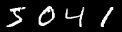

In [28]:
torchvision.transforms.ToPILImage()(torchvision.utils.make_grid(next(iter(data_loader))[0]))

Lets use a basic CNN linear classifier to classify the digits

In [29]:
import torch.nn as nn

class CnnClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_1 = nn.Conv2d(1, 6, 3)
    self.conv_2 = nn.Conv2d(6, 12, 3)
    # Lose 2 width and height per convolutional layer so we'll have 12 filters of size 24*24 so the input is 6912
    self.linear_1 = nn.Linear(6912, 500)
    self.linear_2 = nn.Linear(500, 250)
    self.linear_3 = nn.Linear(250, 100)
    self.linear_4 = nn.Linear(100, 10)
    self.relu = nn.ReLU()


  def forward(self, x):
    x = self.conv_1(x)
    x = self.conv_2(x)
    x = x.reshape(-1, 6912)
    x = self.linear_1(x)
    x = self.relu(x)
    x = self.linear_2(x)
    x = self.relu(x)
    x = self.linear_3(x)
    x = self.relu(x)
    x = self.linear_4(x)
    x = self.relu(x)
    return x

Let's push the image batch from before through the network.

In [30]:
outputs = CnnClassifier()(next(iter(data_loader))[0])

Let's get the network outputs for the batch. The network hasn't been trained yet, so the outputs don't align to anything.

In [31]:
print(outputs)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.1055, 0.0000, 0.0365, 0.0392, 0.0000,
         0.0147],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1020, 0.0000, 0.0340, 0.0431, 0.0000,
         0.0081],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1052, 0.0000, 0.0309, 0.0358, 0.0000,
         0.0154],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0995, 0.0000, 0.0370, 0.0414, 0.0000,
         0.0100]], grad_fn=<ReluBackward0>)


Lets get the index of the maximum value from each of the elements in the output

In [32]:
max_index = torch.argmax(outputs, dim=1)

Then let's make each of the values into a onehot vector.

In [33]:
import torch.nn.functional as F

predicted_classes = max_index

Now let's get the classifications from the dataloader, then convert these to a onehot vector and compare to the predicted values.

In [34]:
actual_classes = next(iter(data_loader))[1]

In [35]:
actual_classes

tensor([5, 0, 4, 1])

In [36]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import torchmetrics

def calc_accuracy_mnist(predicted, actual):
  return torchmetrics.functional.classification.accuracy(predicted, actual, "multiclass", num_classes=10)

Let's train the network, we're not using a testing and validation set here for simplicity.

This code is commented so you can load the trained model if you want rather than training it yourself.

In [38]:
# classifier_net = CnnClassifier()

# import torch.optim as optim

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(classifier_net.parameters(), lr=0.001, momentum=0.9)

# for epoch in range(2):  # loop over the dataset multiple times
#     running_loss = 0.0
#     for i, data in enumerate(data_loader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = classifier_net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#             running_loss = 0.0

# print('Finished Training')

Save the model

In [39]:
# torch.save(classifier_net, "2 epoch trained classifier net.pt")

Load the saved model

In [40]:
classifier_net = torch.load("2 epoch trained classifier net.pt")

Let's see how the new trained classifier performs.

In [41]:
calc_accuracy_mnist(classifier_net(next(iter(data_loader))[0]), next(iter(data_loader))[1])

tensor(1.)

In [42]:
torch.argmax(classifier_net(next(iter(data_loader))[0]), dim=1)

tensor([5, 0, 4, 1])

In [43]:
next(iter(data_loader))[1]

tensor([5, 0, 4, 1])

Let's write some unit tests and some documentation so that we know what we did in future.
Let's put this code into seperate python files.

In [44]:
%%writefile CNNClassifier.py
import torch.nn as nn

class CnnClassifier(nn.Module):
  def __init__(self):
    """
    Initialise the network.

    The network structure is a two convolutional, 4 linear layer network without pooling.

    Parameters
    ----------
    kind : str
        Kind of matplotlib plot.
    color : str, default 'blue'
        Color name or rgb code.
    **kwargs
        These parameters will be passed to the matplotlib plotting
        function.
    """
    super().__init__()
    self.conv_1 = nn.Conv2d(1, 6, 3)
    self.conv_2 = nn.Conv2d(6, 12, 3)
    # Lose 2 width and height per convolutional layer so we'll have 12 filters
    # of size 24*24 so the input is 6912
    self.linear_1 = nn.Linear(6912, 500)
    self.linear_2 = nn.Linear(500, 250)
    self.linear_3 = nn.Linear(250, 100)
    self.linear_4 = nn.Linear(100, 10)
    self.relu = nn.ReLU()


  def forward(self, x):
    """
    PyTorch forward function, called by PyTorch for forward pass.

    Parameters
    ----------
    x : torch.Tensor
        Input tensor data.

    Returns
    -------
    Processed output : torch.Tensor
        Processed data, output of the forward method after passing through the
        full neural network.

    """
    x = self.conv_1(x)
    x = self.conv_2(x)
    x = x.reshape(-1, 6912)
    x = self.linear_1(x)
    x = self.relu(x)
    x = self.linear_2(x)
    x = self.relu(x)
    x = self.linear_3(x)
    x = self.relu(x)
    x = self.linear_4(x)
    x = self.relu(x)
    return x

Overwriting CNNClassifier.py


Let's write a couple of unit tests for the CNNClassifier

In [45]:
%%writefile test_CNNClassifier.py

from CNNClassifier import CnnClassifier
import pytest
import torch

class TestCNNClassifier():
  def test_CNNClassifier_run_random_batch(self):
    cnn_classifier = CnnClassifier()
    random_tensor = torch.testing.make_tensor((4, 1, 28, 28), dtype=torch.float, device="cpu")
    output = cnn_classifier(random_tensor)

    assert output.shape == torch.Size((4, 10))

  def test_pytorch_split_data(self):
    images = torch.testing.make_tensor((10, 4, 1, 28, 28), dtype=torch.float, device="cpu")
    classes = torch.testing.make_tensor((10, 4), dtype=torch.float, device="cpu")

    generator = torch.Generator().manual_seed(42)
    training_images, test_images, validation_images = torch.utils.data.random_split(images, [0.6, 0.3, 0.1], generator=generator)
    training_classes, test_classes, validation_classes = torch.utils.data.random_split(classes, [0.6, 0.3, 0.1], generator=generator)

    assert len(training_images) == (10*0.6)
    assert len(test_images) == (10*0.3)
    assert len(validation_images) == (10*0.1)

    assert len(training_classes) == (10*0.6)
    assert len(test_classes) == (10*0.3)
    assert len(validation_classes) == (10*0.1)

Overwriting test_CNNClassifier.py


In [46]:
!pytest test_CNNClassifier.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0
rootdir: /content/drive/MyDrive/Pytesting
plugins: hypothesis-6.79.3, anyio-3.7.0
collected 2 items                                                              

test_CNNClassifier.py ..                                                 [100%]

============================== 2 passed in 1.66s ===============================


Tests in PyTorch can be done using Tensor data, for example via Tensors initialised by the Tensor function, however it is advised that unit testing should use the torch.testing.make_tensor() function to create Tensors for unit tests.

Let's go back to the previous example test for the model in exercise 3.

Within exercise 3 we used the @given decorator, we can also use the @pytest.mark.parameterise decorator, which allows for us to parameterise the test functions manually.

First let's write a basic accuracy function.

In [47]:
%%writefile calc_accuracy_mnist.py

import torchmetrics

def calc_accuracy_mnist(predicted, actual):
  return torchmetrics.functional.classification.accuracy(predicted, actual, "multiclass", num_classes=10)

Overwriting calc_accuracy_mnist.py


Then lets create a basic test for the accuracy function

In [48]:
%%writefile test_accuracy_score_parameterised_example.py

import torch
import pytest
from calc_accuracy_mnist import calc_accuracy_mnist

@pytest.mark.parametrize("y_true", (torch.testing.make_tensor(3, dtype=torch.float, device="cpu"), torch.testing.make_tensor(5, dtype=torch.int64, device="cpu")))
def test_accuracy_score(y_true):
  # Generate random predictions of the same length as y_true
  y_pred = torch.testing.make_tensor(len(y_true), dtype=torch.float, device="cpu")

  # Use accuracy_score from torchmetrics's accuracy_score
  torchmetrics_acc = calc_accuracy_mnist(y_true, y_pred)

  # Calculate accuracy manually
  manual_acc = torch.sum((y_true == y_pred)) / len(y_true)

  # Assert that the accuracy scores match using torch's inbuilt assert_close method.
  torch.testing.assert_close(torchmetrics_acc, manual_acc)

Overwriting test_accuracy_score_parameterised_example.py


In [49]:
!pytest test_accuracy_score_parameterised_example.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0
rootdir: /content/drive/MyDrive/Pytesting
plugins: hypothesis-6.79.3, anyio-3.7.0
collected 2 items                                                              

test_accuracy_score_parameterised_example.py ..                          [100%]

============================== 2 passed in 2.00s ===============================


The torch.testing.assert_close allows for testing of multiple variables within a pytorch tensor, and can be used to check that the tensors are close to each other, on the same device, of the same dtype or the layouts or structures are the same.

One of the things that can be done with the parametrization is to manually set the device or other specific pytorch properties. So you can make sure that unit tests work on both the "cpu", "gpu" or other devices.

Look at https://github.com/pytorch/pytorch/wiki/Running-and-writing-tests for more information on pytorch unit testing.

Unit testing can make sure your models will run on all types of setups, no matter which code sections you change.

# Exercise 5

The code that we have in multiple files is starting to pile up now. If we keep adding more and more files, we'll probably start forgetting what they do. So we'll generate some documentation to view all of the current files in an easier format using pydoc.

Pydoc is a python package, so we can load it using the python -m "module" syntax, so in this case "python -m pydoc".

In [50]:
!python -m pydoc ./*py

Help on module activations:

NNAAMMEE
    activations

FFUUNNCCTTIIOONNSS
    ssiiggmmooiidd(x)

FFIILLEE
    /content/drive/MyDrive/Pytesting/activations.py


Help on module basic_linear_net:

NNAAMMEE
    basic_linear_net

CCLLAASSSSEESS
    torch.nn.modules.module.Module(builtins.object)
        NeuralNetwork
    
    class NNeeuurraallNNeettwwoorrkk(torch.nn.modules.module.Module)
     |  Method resolution order:
     |      NeuralNetwork
     |      torch.nn.modules.module.Module
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  ____iinniitt____(self)
     |      Initializes internal Module state, shared by both nn.Module and ScriptModule.
     |  
     |  ffoorrwwaarrdd(self, x)
     |      Defines the computation performed at every call.
     |      
     |      Should be overridden by all subclasses.
     |      
     |      .. note::
     |          Although the recipe for forward 

That's a lot of text, kind of hard to read through it all. Pydoc has a feature to convert this text into seperate html files using the -w flag.

In [51]:
!python -m pydoc -w ./*py

wrote activations.html
wrote basic_linear_net.html
wrote calc_accuracy_mnist.html
wrote calc_mean.html
wrote CNNClassifier.html
wrote compartmentalised_linear_res_net.html
2023-06-27 13:28:38.117244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 13:28:39.344858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Class balance: 
No stroke = 0, stroke = 1 
0    4861
1     249
Name: stroke, dtype: int64
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 84        
                                                                 
 dense_1 (Dense)  

This places the methods and classes into different files with the same names as the original python files.

One thing to note here is that this will import all code as modules, so all code will be run unless it is within a __name__ == "__main__" block, as can be seen here with the stoke_model.py script.

Let's create a new docs folder and place all the html files into it.

In [52]:
!mkdir docs

mkdir: cannot create directory ‘docs’: File exists


In [53]:
!mv *.html docs/

We can render a basic html layout in a notebook by using IPython.

In [54]:
import IPython
IPython.display.HTML(filename='./docs/CNNClassifier.html')

This shows us an example of the docstrings that we added into our code. Pydoc is a very simple version of an auto-docstring generator, more complex documentation can be generated with Sphinx or other libraries.

Docstring generation and use is also supported on most IDEs, as well as unit testing. Both can be fully automated, so once they're set up, you don't need to touch either again until you need them (or until a unit test picks up an error from a recent code change).